In [1]:
push!(LOAD_PATH, "../../lib/")

3-element Array{Any,1}:
 "/usr/local/share/julia/site/v0.6"
 "/usr/share/julia/site/v0.6"      
 "../../lib/"                      

In [2]:
using NaCsData

In [3]:
using LsqFit
using PyPlot
using Dierckx

In [4]:
ac = NaCsData.calc_survival("data/servo_700/AC.csv");

In [5]:
orig_depth = 1.7;
fitx = (ac[1] .+ 0.0005) ./ orig_depth; # Assume we had an offset...
fity = ac[2][:, 2];
fitw = ac[3][:, 2];

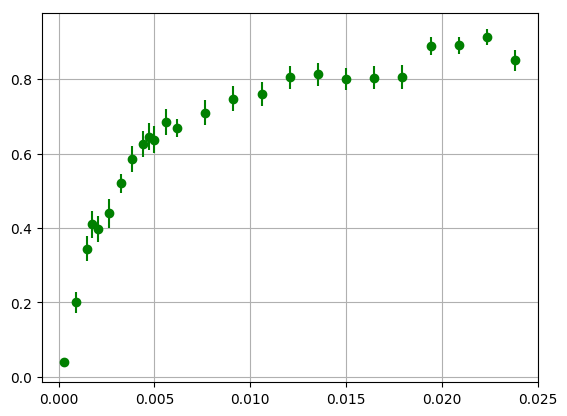

In [6]:
errorbar(fitx, fity, fitw, fmt="go")
grid()

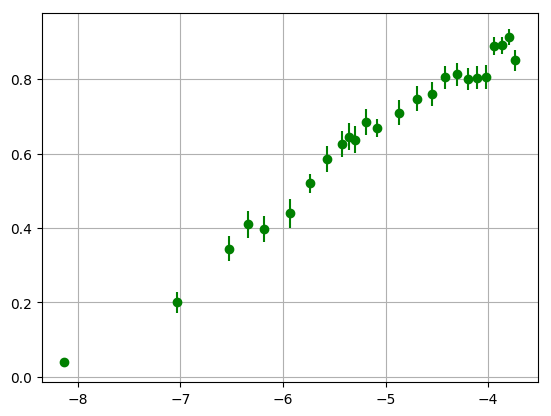

In [7]:
errorbar(log.(fitx), fity, fitw, fmt="go")
grid()

In [8]:
cdf_harmonic(x) = 1 - (1 + x + x.^2 ./ 2) .* exp(-x)

cdf_harmonic (generic function with 1 method)

In [9]:
function model(x, p)
    # x: lowering ratio (compare to initial trap depth)
    # y = p[1] * CDF(ɛ / p[2])
    p[1] .* cdf_harmonic.(sqrt.(x) ./ p[2])
end

model (generic function with 1 method)

In [10]:
fit = curve_fit(model, fitx, fity, 1 ./ (fitw + 0.01), [0.9, 0.05]);

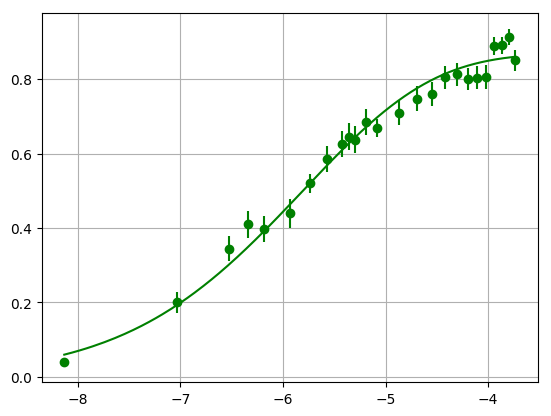

In [11]:
plotx = linspace(minimum(fitx), maximum(fitx), 1000)

plot(log.(plotx), model(plotx, fit.param), "g")
errorbar(log.(fitx), fity, fitw, fmt="go")

grid()

In [12]:
sigma = estimate_errors(fit, 0.95)

2-element Array{Float64,1}:
 0.0196644  
 0.000778953

In [13]:
fit.param[2], sigma[2]

(0.018312607341679013, 0.0007789532385859031)

In [14]:
(fit.param[2], sigma[2]) .* 2500

(45.78151835419753, 1.9473830964647576)